https://networkx.org/documentation/stable/tutorial.html

# Introduction to NetworkX package

NetworkX is a python library for creating, modelling, and visualizing graphs.

In [165]:
import networkx as nx

args = {
    "node_color": 'coral',
    "node_size": 200,
    "edge_color": 'black',
    "linewidths": 1,
    "edgecolors": 'black',
    "font_color": 'black',
    "with_labels": True,
}

# Read/Write operations

The first thing is to create a graph:

```{note} Graph
A graph is a collection of nodes (vertices) and edges (links).
```

In the networkX package, nodes can be any hashable python object, but None can't be a node.

In [166]:
G = nx.Graph()

## Add elements to a graph

### Nodes

The easiest way to add nodes to the graph is the follwing:

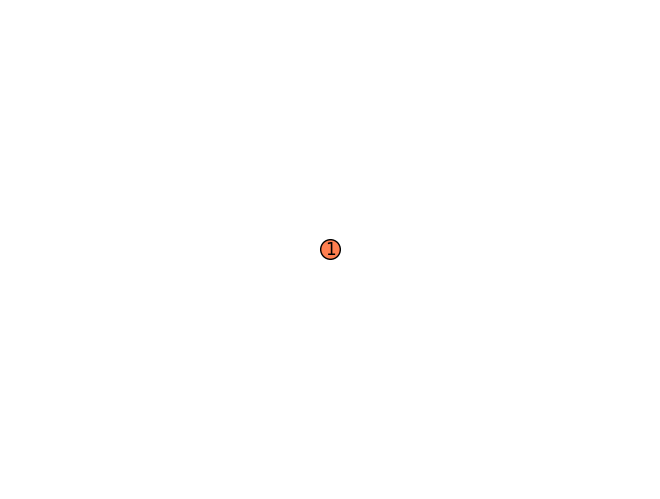

In [167]:
G.add_node(1)

nx.draw(G, **args)

or from any iterable container:

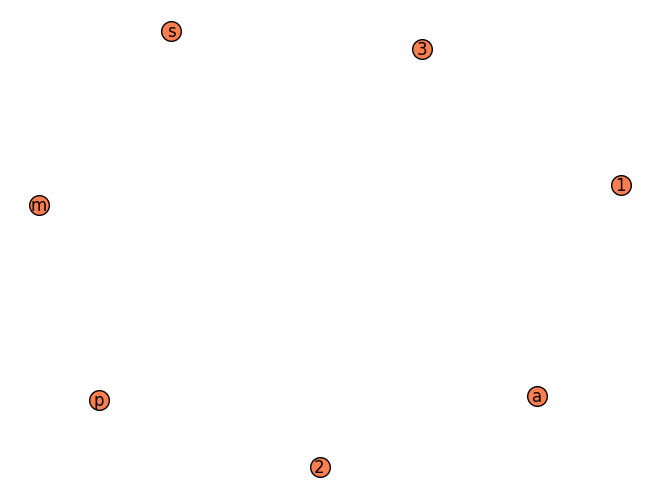

In [168]:
G.add_nodes_from([2, 3]) # one new node for each element of the list
G.add_nodes_from("spam") # one node for each letter of the string

nx.draw(G, **args)

You can also have attributes if the container yields pairs in the form:
`(node, node_attribute_dict)`

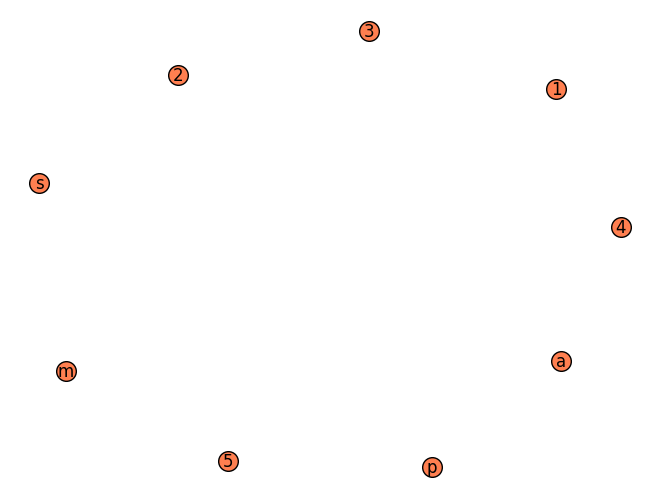

In [169]:
G.add_nodes_from([
    (4, {"color": "red"}),
    (5, {"color": "green"}),
])

nx.draw(G, **args)

Another way is to "import" nodes from another graph:

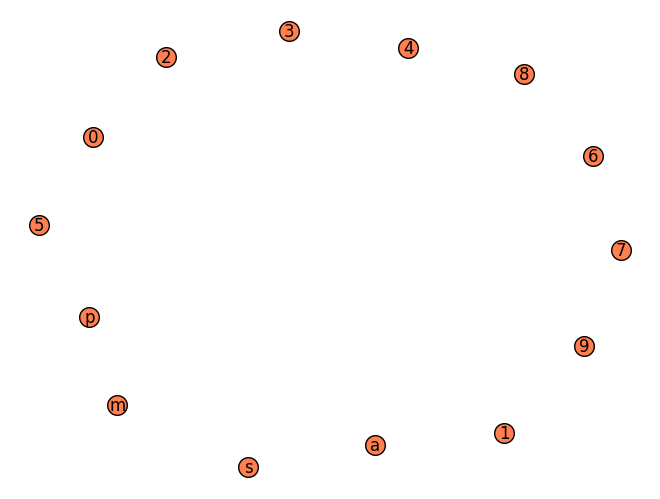

In [170]:
H = nx.path_graph(10)
G.add_nodes_from(H)

nx.draw(G, **args)

networkx is very flexible for it allows you to have graphs of graphs, graph of files, graphs of functions, ecc.

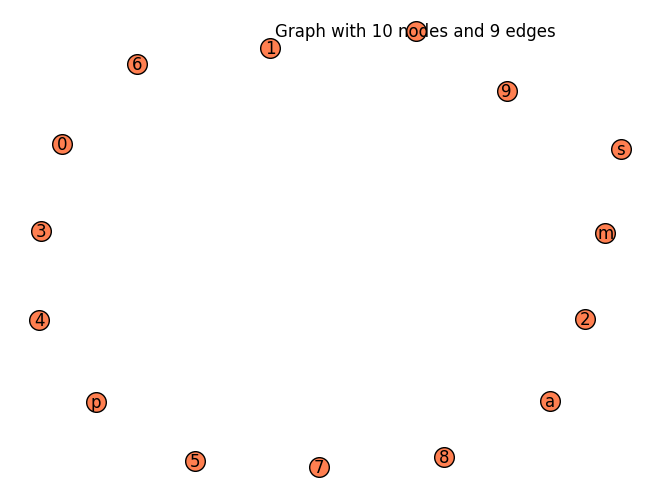

In [171]:
G.add_node(H)

nx.draw(G, **args)

### Edges

To add edges, you can specify a couple by either explicitely passing source and target, or by unpacking the edge tuple:

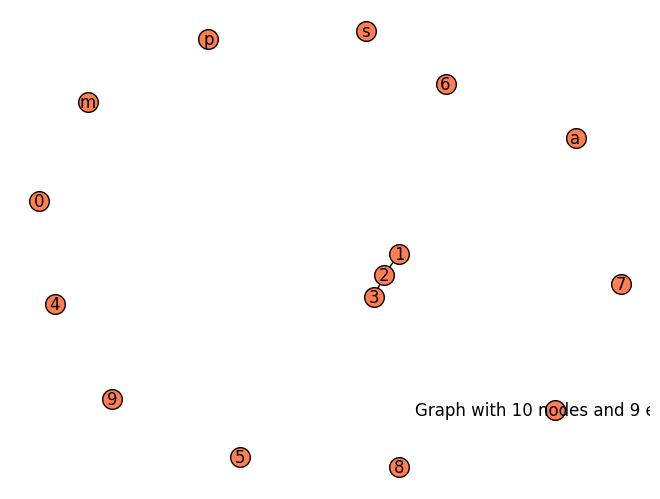

In [172]:
G.add_edge(1, 2)

e = (2, 3)
G.add_edge(*e)

nx.draw(G, **args)

Or by adding a list of edges:

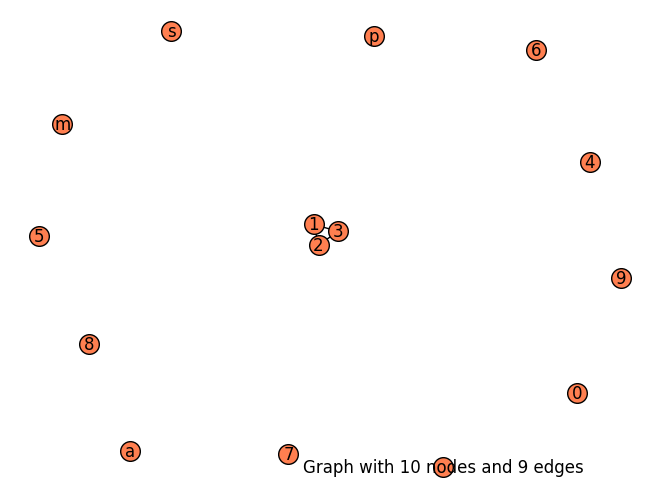

In [173]:
G.add_edges_from([(1, 2), (1, 3)])

nx.draw(G, **args)

Or by adding any _ebunch_ of edges, which is any iterable container of edge-tuples. The two possible syntaxes are:
- 2-tuple of nodes: (1, 2)
- 3-tuple of nodes and attribute dictionary: (2, 3, {"weight": 3.1415})

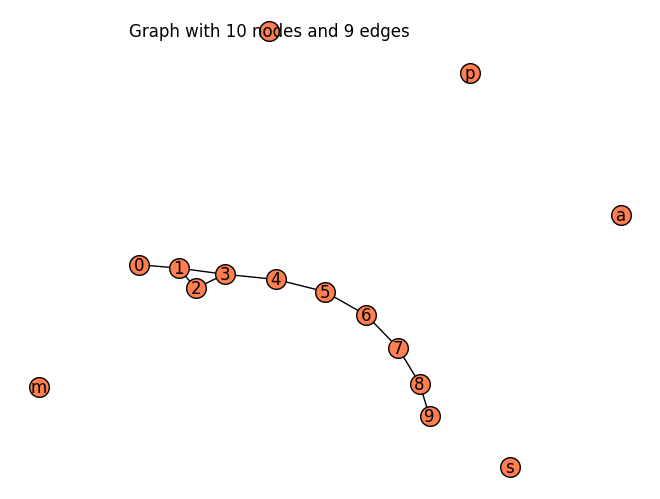

In [174]:
G.add_edges_from(H.edges)

nx.draw(G, **args)

To remove all nodes and edges:

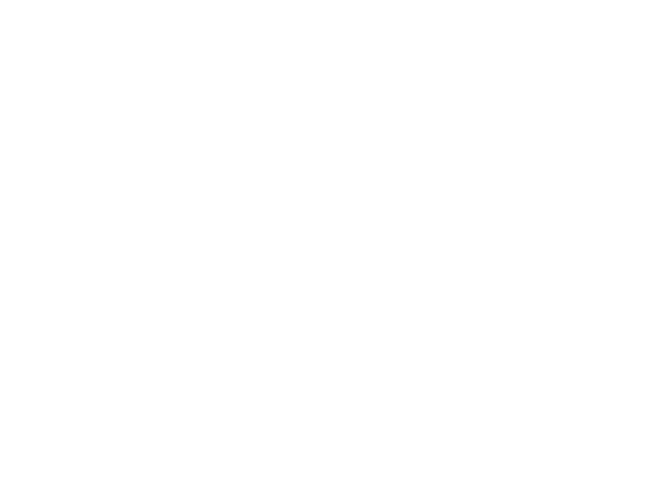

In [175]:
G.clear()

nx.draw(G, **args)

When adding edges, any node that doesn't yet exists is automatically created.
If we then try to recreate those nodes, networkx doesn't raise any error.

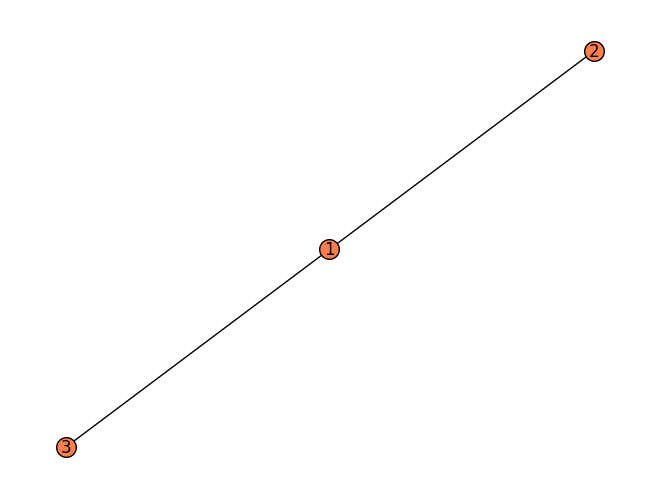

In [176]:
G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_edge(1, 2)

nx.draw(G, **args)

In [177]:
G.number_of_nodes()

3

In [178]:
G.number_of_edges()

2

In the case of a directed graph, the order of the nodes matters when creating the edges:

[1, 4]
[('s', 3), ('a', 'p'), ('a', 2), ('m', 3), (2, 1), (2, 4), (1, 'p')]


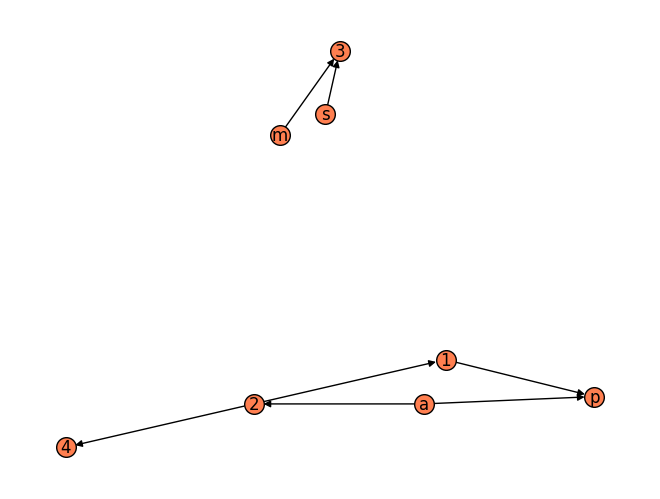

In [179]:
DG = nx.DiGraph()
DG.add_nodes_from("spam")
DG.add_edge(2, 1)
DG.add_edge("m", 3)
DG.add_edge("s", 3)
DG.add_edge(2, 4)
DG.add_edge(1, "p")
DG.add_edge("a", "p")
DG.add_edge("a", 2)

print(list(DG.successors(2)))
print(list(DG.edges))

nx.draw(DG, **args)

## Inspecting the graph

networkx graphs have attributes you can inspect:

In [180]:
print("List of nodes: ", list(G.nodes))
print("List of edges: ", list(G.edges))
print("List of nodes incident to node 1: ", list(G.adj[1]))
print("Number of nodes incident to node 1: ", G.degree[1])

List of nodes:  [1, 2, 3]
List of edges:  [(1, 2), (1, 3)]
List of nodes incident to node 1:  [2, 3]
Number of nodes incident to node 1:  2


or specify which edges or degree you want to look at:

In [181]:
print("Edges that have nodes 2 and 3 as source: ")
DG.edges([2, 3])

Edges that have nodes 2 and 3 as source: 


OutEdgeDataView([(2, 1), (2, 4)])

In [182]:
print("Degree of the nodes 2 and 3: ")
DG.degree([2, 3])

Degree of the nodes 2 and 3: 


DiDegreeView({2: 3, 3: 2})

## Delete elements from a graph

We can also remove elements from a graph using analogous functions as the ones to used to add elements:
- `Graph.remove_node()`
- `Graph.remove_nodes_from()`
- `Graph.remove_edge()`
- `Graph.remove_edges_from()`

In [183]:
DG.remove_node(1)
DG.remove_nodes_from("spam")
print(list(DG.nodes))

[2, 3, 4]


In [184]:
DG.remove_edge(2, 4)
print(list(DG))

[2, 3, 4]


## Creating graphs using constructors

- - -